In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


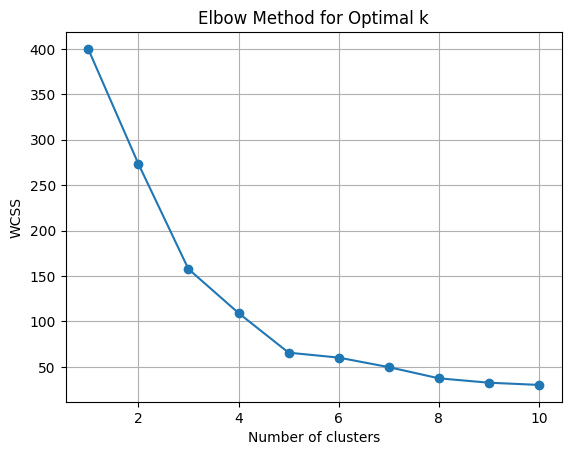

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


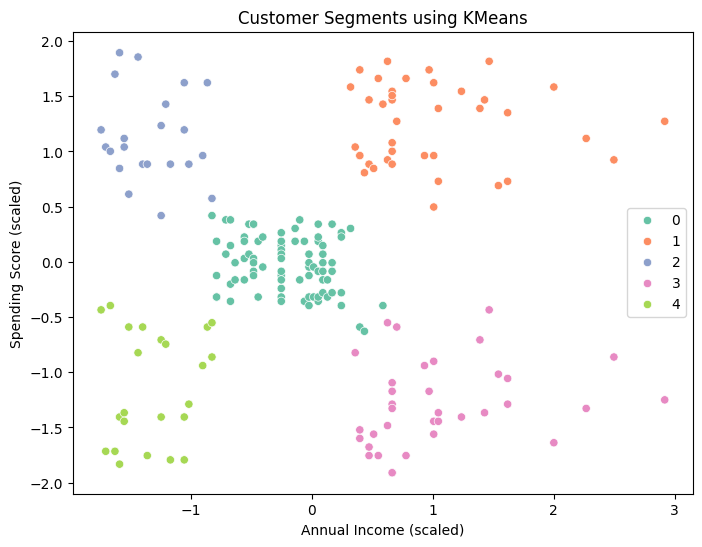

KMeans Silhouette Score: 0.55


In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = kmeans_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette="Set2")
plt.title("Customer Segments using KMeans")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.2f}")


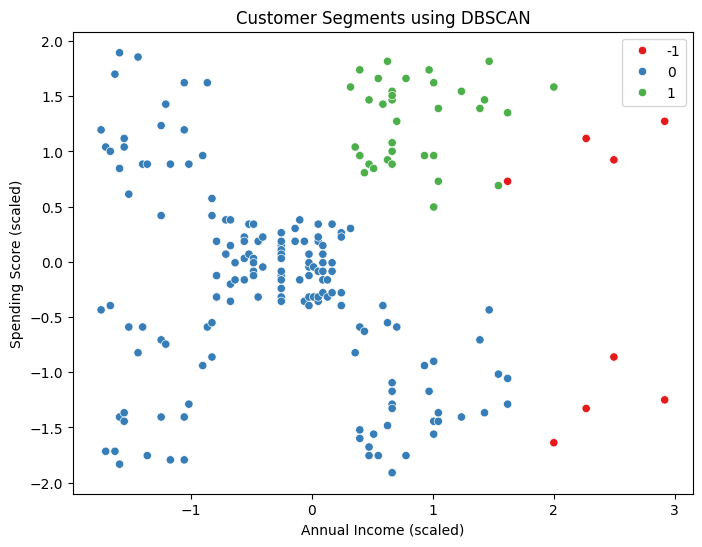

DBSCAN Silhouette Score (excluding noise): 0.39


In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = db_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=db_labels, palette="Set1")
plt.title("Customer Segments using DBSCAN")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

if len(set(db_labels)) > 1 and -1 in db_labels:
    db_silhouette = silhouette_score(X_scaled[db_labels != -1], db_labels[db_labels != -1])
    print(f"DBSCAN Silhouette Score (excluding noise): {db_silhouette:.2f}")
else:
    print("DBSCAN found only one cluster or too many noise points.")


In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    kmeans = KMeans(n_clusters=5, random_state=42)
    labels = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Average CV score
avg_cv_score = np.mean(silhouette_scores)
print(f"\nAverage Silhouette Score using 5-Fold CV on KMeans: {avg_cv_score:.2f}")



Average Silhouette Score using 5-Fold CV on KMeans: 0.53
